In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
###Import Data into a Pandas DF###
path = '/Users/hf/Desktop/Capstone1/data/raw_data.csv'
df = pd.read_csv(path)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df['NA'] = 0

In [5]:
df.loc[df.isna().any(axis=1), "NA"] = 1

In [6]:
no_nan = df[df['NA']==0]

In [7]:
no_nan = no_nan.drop(['NA'], axis=1)

In [24]:
no_nan['Gender'] = no_nan['Gender'].astype('category')
no_nan[['Vigorous work activity', 'Moderate work activity',
       'Vigorous recreational activity', 'Moderate recreational activity']]=no_nan[['Vigorous work activity', 'Moderate work activity',
       'Vigorous recreational activity', 'Moderate recreational activity']].astype('category')

In [25]:
no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 2 to 10147
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   SEQN                            4423 non-null   float64 
 1   Age                             4423 non-null   float64 
 2   Gender                          4423 non-null   category
 3   Race                            4423 non-null   float64 
 4   Systolic BP                     4423 non-null   float64 
 5   Diastolic BP                    4423 non-null   float64 
 6   Resting HR                      4423 non-null   float64 
 7   Weight                          4423 non-null   float64 
 8   Height                          4423 non-null   float64 
 9   BMI                             4423 non-null   float64 
 10  Waist Circumference             4423 non-null   float64 
 11  Tricep Skinfold                 4423 non-null   float64 
 12  Subscap Skinfold   

## Removing Outliers:  

There were a handful of values from LBXCRP that were way out of range so I decided to remove all values that were > (1.5 x IQR) above the 3rd quartile and (1.5 x IQR) below the 1st quartile.  The unfortunate result of this is that I lost a further 1,681 rows of data.  Which isn't good.

In [45]:
#no_nan.boxplot(grid=False, vert=False, fontsize=10, figsize=(15,10))

In [46]:
# Q1 = no_nan.quantile(0.25)
# Q3 = no_nan.quantile(0.75)
# IQR = Q3-Q1

In [47]:
# no_nan = no_nan[~((no_nan < (Q1 - 1.5 * IQR)) |(no_nan> (Q3 + 1.5 * IQR))).any(axis=1)]

In [26]:
no_nan.describe()

,SEQN,Age,Race,Systolic BP,Diastolic BP,Resting HR,Weight,Height,BMI,Waist Circumference,Tricep Skinfold,Subscap Skinfold,Walk or bicycle,Minutes sedentary,Femur BMD,Femoral Neck BMD,Trochanter BMD,LBXCRP,LBX_log
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,46581.755596,43.789057,2.770066,122.153742,68.349537,72.858693,74.119218,167.382229,26.333651,92.201831,17.502193,19.953945,1.702238,343.929007,0.964078,0.840214,0.731655,0.315474,-2.064048
std,2940.860226,21.133153,1.068351,18.543136,13.201493,12.366251,16.943354,10.111178,5.039482,14.195223,7.870257,8.422363,0.457326,500.920774,0.159105,0.153632,0.134969,0.711197,1.350228
min,41477.000000,12.000000,1.000000,78.000000,0.000000,42.000000,27.100000,132.700000,14.200000,55.100000,3.000000,4.000000,1.000000,0.000000,0.458000,0.340000,0.303000,0.010000,-4.605170
25%,44055.000000,24.000000,2.000000,110.000000,60.000000,64.000000,61.800000,160.100000,22.650000,81.800000,11.200000,13.100000,1.000000,180.000000,0.856000,0.732000,0.640000,0.050000,-2.995732
50%,46594.000000,43.000000,3.000000,118.000000,68.000000,72.000000,72.700000,167.100000,26.020000,92.000000,16.200000,19.200000,2.000000,300.000000,0.962000,0.833000,0.724000,0.130000,-2.040221
75%,49145.500000,62.000000,3.000000,130.000000,76.000000,80.000000,84.900000,174.700000,29.430000,101.950000,23.000000,26.000000,2.000000,480.000000,1.068000,0.940000,0.819000,0.320000,-1.139434
max,51622.000000,80.000000,5.000000,222.000000,116.000000,224.000000,135.400000,203.800000,50.490000,141.400000,40.600000,41.600000,2.000000,9999.000000,1.513000,1.487000,1.250000,20.000000,2.995732


## Heatmap of Features

In [10]:
corr = no_nan.corr(method='spearman')

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

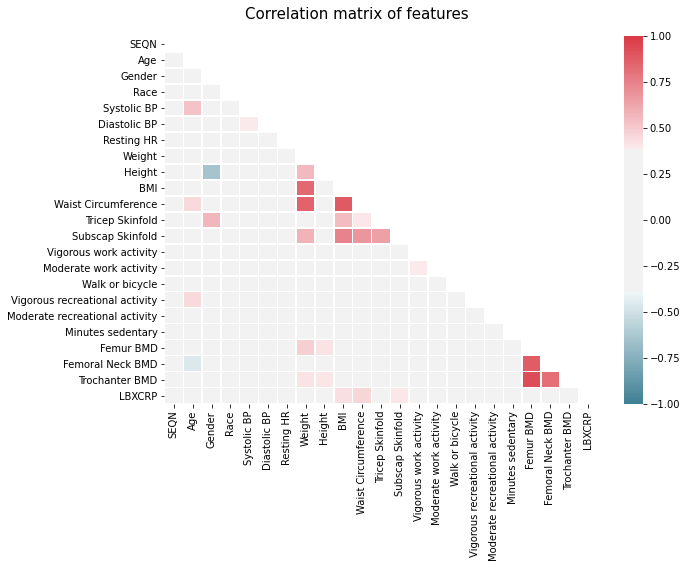

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()

## Histogram of LBXCRP (target)

<AxesSubplot:xlabel='LBXCRP'>

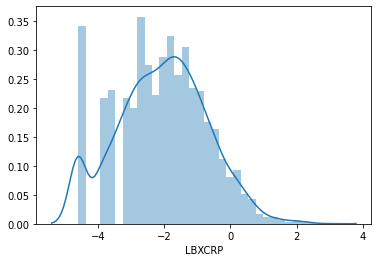

In [13]:
sns.distplot(no_nan['LBXCRP'].apply(np.log))

In [54]:
#log_mean = no_nan['LBX_log'].mean()

In [27]:
no_nan['LBX_log']=no_nan['LBXCRP'].apply(np.log)

### Comparison of C-reactive protein (LBXCRP) between Men (1) and Women (2):

AttributeError: 'AxesSubplot' object has no attribute 'map'

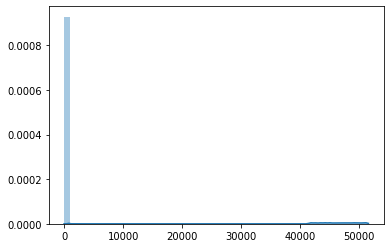

In [28]:
g = sns.distplot(no_nan)
g.map(plt.hist, "LBX_log");

In [16]:
print("The mean CRP for men is: ", no_nan[no_nan.Gender==1].LBX_log.mean())
print("The mean CRP for womenmen is: ", no_nan[no_nan.Gender==2].LBX_log.mean())


The mean CRP for men is:  -2.157513286455412
The mean CRP for womenmen is:  -1.9597156136273555


## Bivariate scatterplots comparing features to LBXCRP:

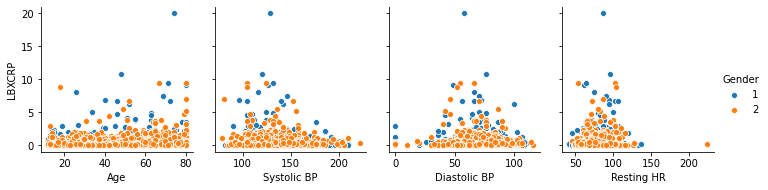

In [17]:
sns.pairplot(x_vars=['Age', 'Systolic BP', 'Diastolic BP', 'Resting HR'], y_vars=['LBXCRP'], data=no_nan, hue='Gender')

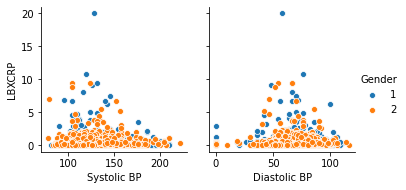

In [18]:
sns.pairplot(x_vars=['Systolic BP', 'Diastolic BP'], y_vars=['LBXCRP'], data=no_nan, hue='Gender')

Note (8/7/2020) - May want to keep the chart of Height vs. LBXCRP given the gender differences.  Could support the notion of creating 2 models.  one for men and one for women.

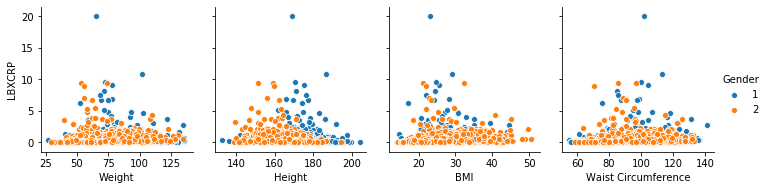

In [60]:
sns.pairplot(x_vars=['Weight', 'Height', 'BMI', 'Waist Circumference'], y_vars=['LBXCRP'], data=no_nan, hue='Gender')

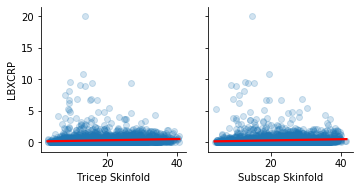

In [61]:
sns.pairplot(x_vars=['Tricep Skinfold', 'Subscap Skinfold'], y_vars=['LBXCRP'], data=no_nan
             , kind='reg', 
            plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

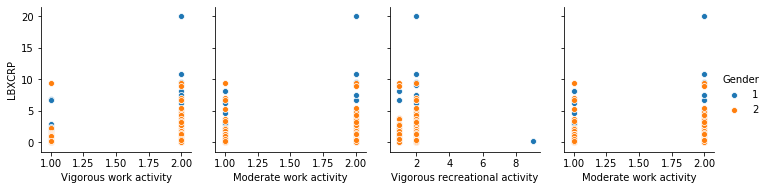

In [62]:
sns.pairplot(x_vars=['Vigorous work activity', 'Moderate work activity', 
                    'Vigorous recreational activity', 'Moderate work activity'], y_vars=['LBXCRP'], data=no_nan, hue='Gender')

In [63]:
no_nan.groupby('Gender')[['Vigorous work activity', 'Moderate work activity', 
                    'Vigorous recreational activity', 'Moderate work activity']].mean()

,Vigorous work activity,Moderate work activity,Vigorous recreational activity,Moderate work activity
Gender,,,,
1,1.714531,1.535362,1.636520,1.535362
2,1.899043,1.659330,1.766986,1.659330


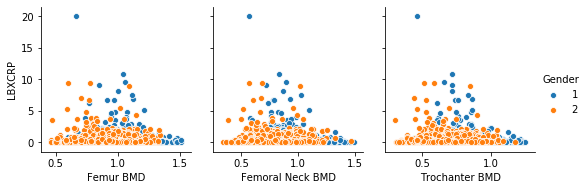

In [64]:
sns.pairplot(x_vars=['Femur BMD', 'Femoral Neck BMD', 'Trochanter BMD'], y_vars=['LBXCRP'], data=no_nan, hue='Gender')

In [65]:
no_nan.groupby('Gender')[['Femur BMD', 'Femoral Neck BMD', 'Trochanter BMD']].mean()

,Femur BMD,Femoral Neck BMD,Trochanter BMD
Gender,,,
1,1.020823,0.875509,0.778694
2,0.900736,0.800815,0.679146


In [66]:
no_nan['LBXCRP'].describe()

count    4423.000000
mean        0.315474
std         0.711197
min         0.010000
25%         0.050000
50%         0.130000
75%         0.320000
max        20.000000
Name: LBXCRP, dtype: float64

In [67]:
no_nan['Femur BMD'].describe()

count    4423.000000
mean        0.964078
std         0.159105
min         0.458000
25%         0.856000
50%         0.962000
75%         1.068000
max         1.513000
Name: Femur BMD, dtype: float64

In [68]:
no_nan[no_nan['LBXCRP']>15].LBXCRP.count()

1

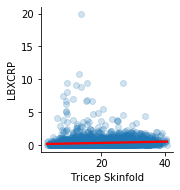

In [69]:
sns.pairplot(x_vars=['Tricep Skinfold'], y_vars=['LBXCRP'], data=no_nan
             , kind='reg', 
            plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

In [29]:
no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 2 to 10147
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   SEQN                            4423 non-null   float64 
 1   Age                             4423 non-null   float64 
 2   Gender                          4423 non-null   category
 3   Race                            4423 non-null   float64 
 4   Systolic BP                     4423 non-null   float64 
 5   Diastolic BP                    4423 non-null   float64 
 6   Resting HR                      4423 non-null   float64 
 7   Weight                          4423 non-null   float64 
 8   Height                          4423 non-null   float64 
 9   BMI                             4423 non-null   float64 
 10  Waist Circumference             4423 non-null   float64 
 11  Tricep Skinfold                 4423 non-null   float64 
 12  Subscap Skinfold   

In [31]:
path_data = '/Users/hf/Desktop/Capstone1/data/'
no_nan.to_csv(path_data+'data_for_LR.csv')